In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [8]:
data = pd.read_csv("./training.csv")
print(data.shape)

(7049, 31)


In [9]:
data['Image'] = data['Image'].apply(lambda row: np.fromstring(row, sep=' '))
# 결측치가 있는 row를 없앰
data = data.dropna()
print(data.shape)

(2140, 31)


In [15]:
# 이미지를 0~1 사이로 정규화
X_train = np.vstack(data['Image'].values) / 255.
# 계산이 용이하도록 int로 표현되는 명암을 float 타입으로 변경
X_train = X_train.astype(np.float32)

print(data['Image'].values.shape)

# 2차원 이미지로 만들어주기
X_train = X_train.reshape(-1, 96, 96, 1)

print(X_train.shape)

(2140,)
(2140, 96, 96, 1)


In [16]:
y = data[data.columns[:-1]].values
# 이미지의 중앙점을 기준으로 -1~1 사이로 표현되기 위해 좌표를 중앙으로 정규화
y = (y - 48) / 48

X_train, y = shuffle(X_train, y, random_state=42)  # shuffle train data
y = y.astype(np.float32)

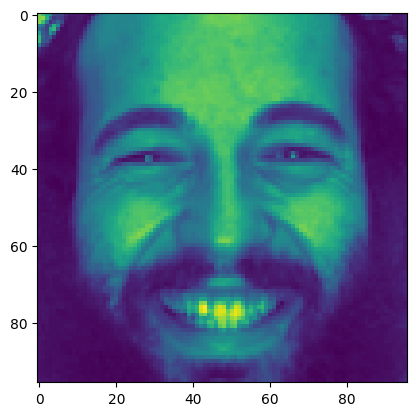

In [17]:
plt.imshow(X_train[0])

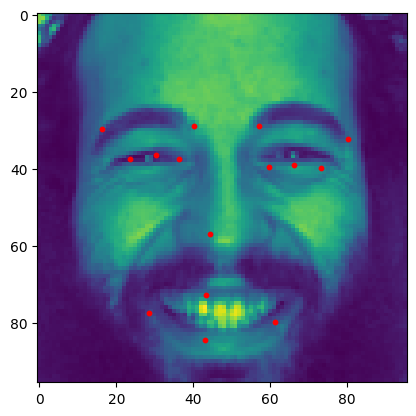

In [22]:
facial_pts = data.drop(['Image'], axis=1).to_numpy()

plt.scatter(facial_pts[0, 0::2], facial_pts[0, 1::2],marker='o',c='r',s=10)
plt.imshow(X_train[0])

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense

model =  Sequential()
model.add(Conv2D(filters=16, kernel_size=3, activation = 'relu', input_shape=(96,96,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(30))

model.summary()

2023-06-20 11:50:33.800448: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 11:50:33.994616: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 11:50:33.996917: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 11:50:35.493664: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

2023-06-20 11:50:36.758991: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:1c:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-20 11:50:36.759719: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Non-trainable params: 0
_________________________________________________________________


In [24]:
#Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

model.fit(X_train, y, validation_split=0.2,
         batch_size=32, epochs=50
         , verbose=1)

model.save('my_model.h5'),
model.load_weights('my_model.h5')

Epoch 1/50
54/54 [==============================] - 6s 91ms/step - loss: 0.0187 - accuracy: 0.5532 - val_loss: 0.0056 - val_accuracy: 0.6963
Epoch 2/50
54/54 [==============================] - 5s 84ms/step - loss: 0.0065 - accuracy: 0.6431 - val_loss: 0.0044 - val_accuracy: 0.6963
Epoch 3/50
54/54 [==============================] - 5s 90ms/step - loss: 0.0057 - accuracy: 0.6817 - val_loss: 0.0047 - val_accuracy: 0.6963
Epoch 4/50
54/54 [==============================] - 5s 95ms/step - loss: 0.0055 - accuracy: 0.6828 - val_loss: 0.0046 - val_accuracy: 0.6963
Epoch 5/50
54/54 [==============================] - 4s 82ms/step - loss: 0.0052 - accuracy: 0.6963 - val_loss: 0.0042 - val_accuracy: 0.6963
Epoch 6/50
54/54 [==============================] - 4s 82ms/step - loss: 0.0050 - accuracy: 0.6928 - val_loss: 0.0041 - val_accuracy: 0.6963
Epoch 7/50
54/54 [==============================] - 5s 84ms/step - loss: 0.0047 - accuracy: 0.6951 - val_loss: 0.0039 - val_accuracy: 0.6963
Epoch 8/50
54

In [68]:
import cv2

img = cv2.imread("test2.png", cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(96,96))/255
img = img.reshape(1, 96, 96, 1)
print(img.shape)

(1, 96, 96, 1)


1/1 [==============================] - 0s 29ms/step
(1, 30)
[67.88464  25.08628  59.125343 76.73812  34.00238  15.48674  57.428955
 81.81618  36.747864  9.31237  50.49297  67.134125 30.612026 49.68425
 49.934002]


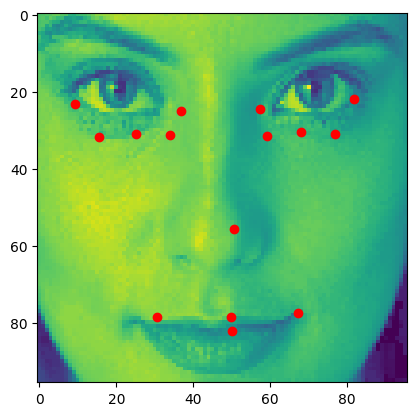

In [69]:
y_predict = model.predict(img)
print(y_predict.shape)
print(y_predict[0, 0::2] * 48 + 48)

plt.figure()
plt.imshow(img.reshape((96, 96)))
plt.scatter(((y_predict[0, 0::2] * 48 + 48)), 
            ((y_predict[0, 1::2] * 48 + 48)), 
                   marker='o', c='r')
plt.show()